In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"D:\Data_Science\datasets\netflix\netflix_titles.csv")
df.sample(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4261,s4262,TV Show,Way Back into Love,NaN,"June Tsai, Ray Chang, Lung Shao-hua, Yi-Wen Ye...",Taiwan,"December 24, 2018",2011,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","After years in the U.S., a Taiwanese immigrant..."
6860,s6861,Movie,God of War,Gordon Chan,"Vincent Zhao, Sammo Kam-Bo Hung, Regina Wan, Y...","China, Hong Kong","December 16, 2017",2017,NR,129 min,"Action & Adventure, International Movies",A maverick leader and a clever young general t...


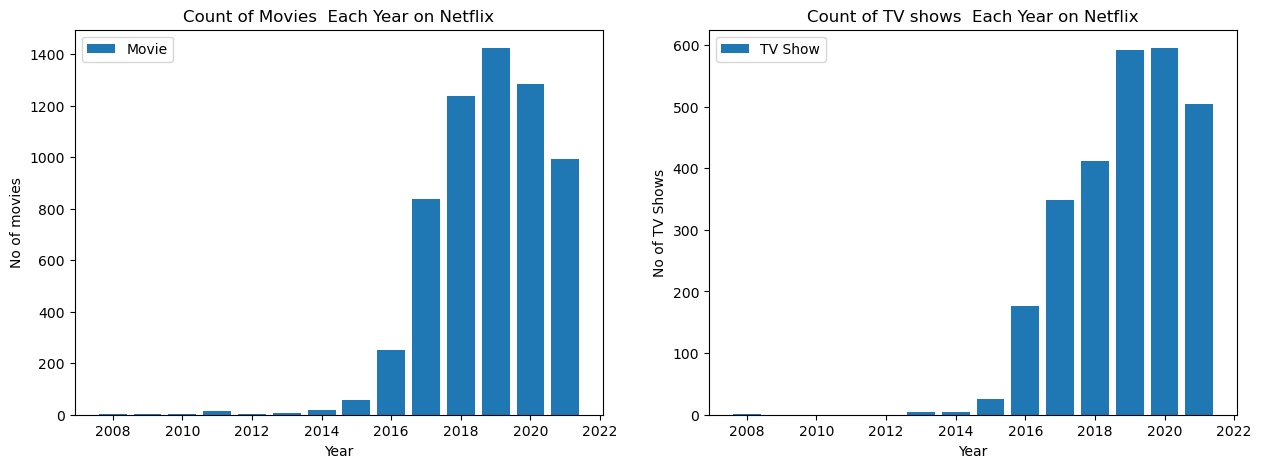

In [9]:
#Medium: Create subplots for number of shows added per year by type (Movie, TV Show).
df=df.dropna(subset=['date_added'])
df['Year']=df['date_added'].str.split(",").str[1].str.strip().astype('Int16')
df1=df.groupby(["Year","type"]).size().sort_index()
info1=df1.xs('Movie',level='type')
info2=df1.xs('TV Show',level='type')
all_indexes = info1.index.union(info2.index)
# Reindex both Series, filling missing values with 0
info1_full = info1.reindex(all_indexes, fill_value=0)
info2_full = info2.reindex(all_indexes, fill_value=0)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].bar(info1_full.index, info1_full.values, label="Movie")
ax[0].set_title("Count of Movies  Each Year on Netflix")
ax[0].set_ylabel("No of movies")
ax[0].set_xlabel("Year")
ax[0].legend()
ax[1].bar(info2_full.index, info2_full.values, label="TV Show")
ax[1].set_title("Count of TV shows  Each Year on Netflix")
ax[1].set_ylabel("No of TV Shows")
ax[1].set_xlabel("Year")
ax[1].legend()
#fig.show()
plt.show()

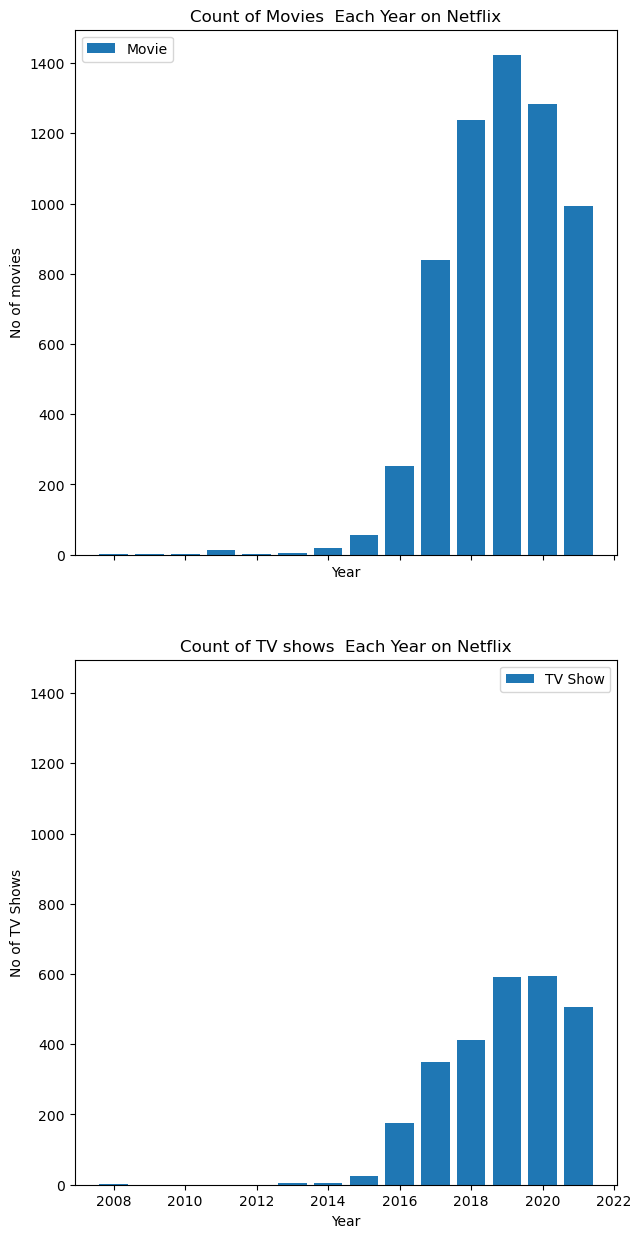

In [12]:
#Medium: Create subplots for number of shows added per year by type (Movie, TV Show).
df=df.dropna(subset=['date_added'])
df['Year']=df['date_added'].str.split(",").str[1].str.strip().astype('Int16')
df1=df.groupby(["Year","type"]).size().sort_index()
info1=df1.xs('Movie',level='type')
info2=df1.xs('TV Show',level='type')
all_indexes = info1.index.union(info2.index)
# Reindex both Series, filling missing values with 0
info1_full = info1.reindex(all_indexes, fill_value=0)
info2_full = info2.reindex(all_indexes, fill_value=0)

fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(7,15),sharex=True,sharey=True)
ax[0].bar(info1_full.index, info1_full.values, label="Movie")
ax[0].set_title("Count of Movies  Each Year on Netflix")
ax[0].set_ylabel("No of movies")
ax[0].set_xlabel("Year")
ax[0].legend()
ax[1].bar(info2_full.index, info2_full.values, label="TV Show")
ax[1].set_title("Count of TV shows  Each Year on Netflix")
ax[1].set_ylabel("No of TV Shows")
ax[1].set_xlabel("Year")
ax[1].legend()
#fig.show()
plt.show()

In [17]:
df.country

0       United States
1        South Africa
2                 NaN
3                 NaN
4               India
            ...      
8802    United States
8803              NaN
8804    United States
8805    United States
8806            India
Name: country, Length: 8797, dtype: object

In [23]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.dropna(subset=['country'])
df.dropna(subset=['date_added'])
df1=df.pivot_table(index='country', columns='Year', values='show_id',aggfunc='count')
df1=df1.fillna(0)



Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,,,,,,,,
", France, Algeria",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
", South Korea",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,16.0,11.0,12.0,8.0
"Argentina, Brazil, France, Poland, Germany, Denmark",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
"Argentina, Chile",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"Venezuela, Colombia",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Vietnam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0


In [19]:
heatdata

Year,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
country,,,,,,,,,,,,,,
", France, Algeria",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
", South Korea",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,16.0,11.0,12.0,8.0
"Argentina, Brazil, France, Poland, Germany, Denmark",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
"Argentina, Chile",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"Venezuela, Colombia",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Vietnam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0


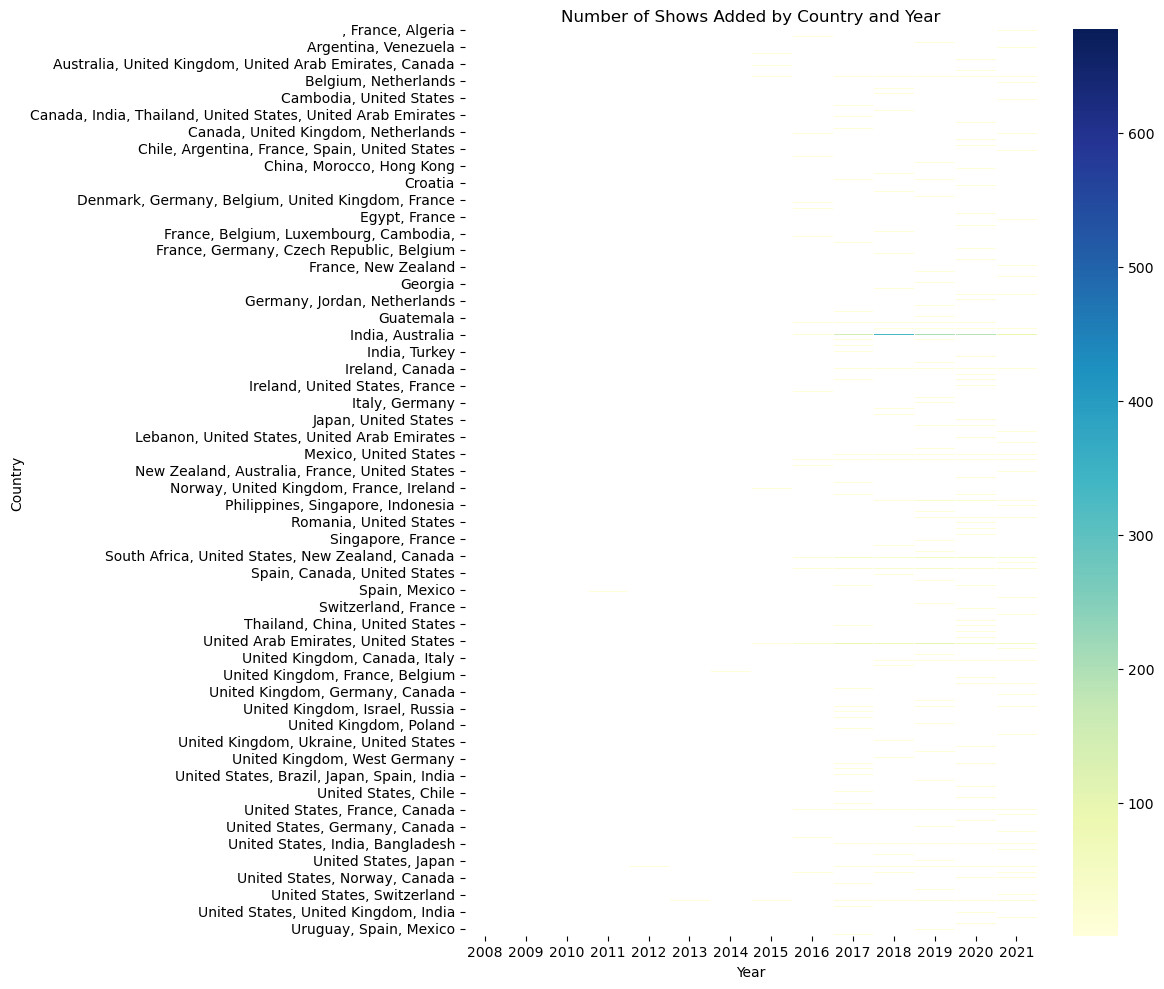

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(
    df1,
    cmap="YlGnBu",
    linewidths=0.5
)
plt.title("Number of Shows Added by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()